Predicting reaction performance in C–N cross-coupling using machine learning
Experimental data obtained from <i> Ahneman et al publication in Science DOI: 10.1126/science.aar5169.                     

Note that the authors used 120 Molecular descriptors calculated using Density Functional Theory (DFT) to predict the yield of C-N cross-coupling reactions.They used R programming language to develop Machine Learning Models. Based on their publications, Random Forest was the best model to predict the yield of C-N cross-coupling reactions. But, here I used sklearn for Random Forest, XGBoost and Tensorflow/keras for deep learning. The data was splitted to training(70%) and test(30%).Although XGBoost performs slightly better, the performace of these models are pretty much similar. 
    
 

                            Gashaw M. Goshu, Ph.D

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
%matplotlib inline

In [2]:
# open a file containing descriptors and yield
data = pd.read_csv("Descriptor_and_yield_table.csv")
X_data = data.drop(['yield'], axis =1) # the 120 descriptors and their values
y_data = data['yield'] # Yield of the 3560 rows is stored in the y_data variable

In [3]:
data

,additive_*C3_NMR_shift,additive_*C3_electrostatic_charge,additive_*C4_NMR_shift,additive_*C4_electrostatic_charge,additive_*C5_NMR_shift,additive_*C5_electrostatic_charge,additive_*N1_electrostatic_charge,additive_*O1_electrostatic_charge,additive_E_HOMO,additive_E_LUMO,...,ligand_V6_frequency,ligand_V6_intensity,ligand_V7_frequency,ligand_V7_intensity,ligand_V8_frequency,ligand_V8_intensity,ligand_V9_frequency,ligand_V9_intensity,ligand_dipole_moment,yield
0,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,10.657812
1,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,14.747896
2,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,18.278686
3,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,2.475058
4,143.12,0.223,93.06,-0.447,162.34,0.292,-0.334,-0.057,-0.2317,-0.0487,...,1640.307,4.414,3026.561,16.577,3043.097,18.145,3064.344,38.210,1.212924,6.119058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,57.426670
3956,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,86.233157
3957,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,1.440081
3958,152.98,0.429,98.09,-0.589,159.31,0.387,-0.350,-0.068,-0.2337,-0.0696,...,1631.618,37.445,3025.675,16.220,1054.500,1.432,3041.406,35.621,3.735286,43.538365


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Columns: 121 entries, additive_*C3_NMR_shift to yield
dtypes: float64(121)
memory usage: 3.7 MB


<AxesSubplot:>

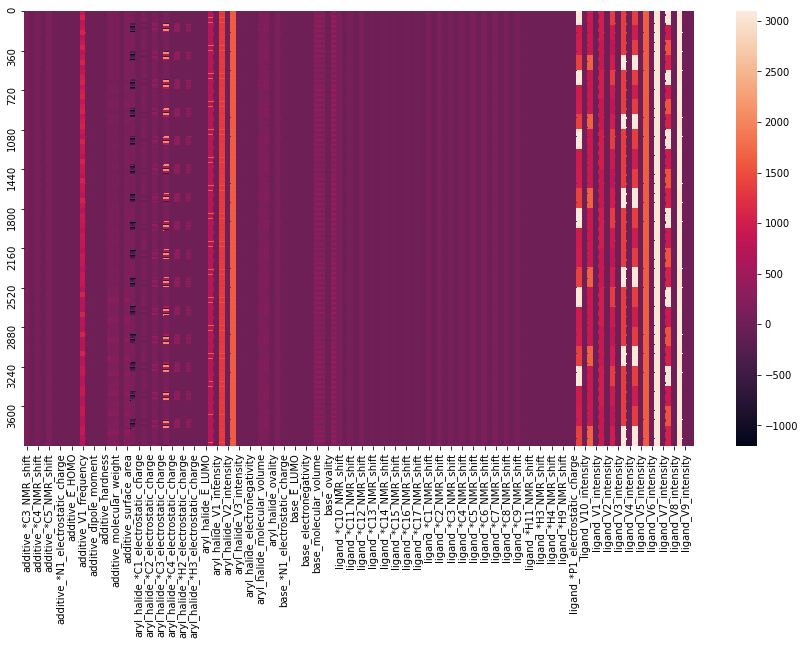

In [5]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_data,yticklabels=360)

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data,test_size = 0.3, random_state=1)
rf = RandomForestRegressor(n_estimators=500, random_state=42)

In [7]:
# Data preprocessing or normalization
# scale train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# scale test set
X_valid = scaler.transform(X_valid)

<AxesSubplot:>

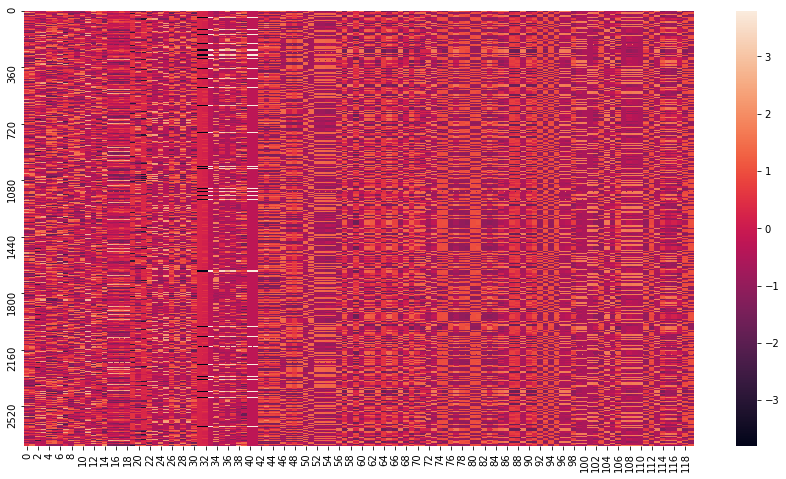

In [8]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the seven columns or descriptors
sn.heatmap(data=X_train,yticklabels=360)

In [9]:
# Model Training and prediction
rf.fit(X_train,y_train) # training using 70% of the data
predicted_yield = rf.predict(X_valid) # predicting yield for 30% of the data

In [10]:
# Model accuracy using root mean square error 
rmse = np.sqrt(mean_squared_error(y_valid, predicted_yield )) 
print('rmse:', rmse)

rmse: 7.586254188186027


In [11]:
# R^2 (coefficient of determination) regression score function: 
R2 =r2_score(y_valid, predicted_yield )
print('R^2:', R2)

R^2: 0.9254857017011334


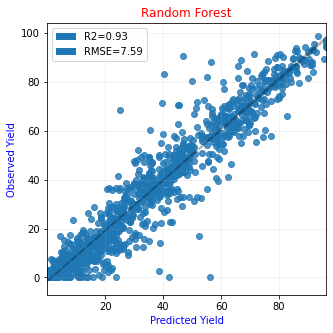

In [12]:
fig = plt.figure(figsize=(5,5))
sn.regplot(x=predicted_yield , y=y_valid,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.2})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Random Forest", color='red')
plt.grid(alpha=0.2)
R2 = mpatches.Patch(label="R2={:04.2f}".format(R2))
rmse = mpatches.Patch(label="RMSE={:04.2f}".format(rmse))
plt.legend(handles=[R2, rmse])

In [13]:
# Feature importance Random forest
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(pipe, random_state=1).fit(X_valid, y_valid)
# eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

In [14]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, random_state=42)


In [15]:
# Model Training and prediction
xgb.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = xgb.predict(X_valid) # predicting yield for 30% of the data

In [16]:
# Model accuracy using root mean square error 
rmse2 = np.sqrt(mean_squared_error(y_valid, predicted_yield2))  
print('rmse:', rmse2)

rmse: 6.693496111327877


In [17]:
# R^2 (coefficient of determination) regression score function: 
R_2 =r2_score(y_valid, predicted_yield2)
print('R^2:', R_2)

R^2: 0.9419916027336953


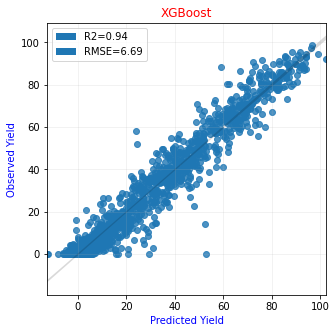

In [18]:
fig = plt.figure(figsize=(5,5))
sn.regplot(x=predicted_yield2, y=y_valid,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.2})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("XGBoost", color='red')
plt.grid(alpha=0.2)
R_2 = mpatches.Patch(label="R2={:04.2f}".format(R_2))
rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
plt.legend(handles=[R_2, rmse2])

In [19]:
model = keras.Sequential([
    layers.Input(shape=(120,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
     layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [20]:
 model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [21]:
history= model.fit(X_train,y_train, epochs=100,validation_split=0.2)

Epoch 1/100
70/70 [==============================] - 0s 6ms/step - loss: 20.0411 - val_loss: 14.5026
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 12.7723 - val_loss: 12.3196
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 10.8795 - val_loss: 10.6384
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 9.3202 - val_loss: 9.5665
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 8.8673 - val_loss: 8.4244
Epoch 6/100
70/70 [==============================] - 0s 3ms/step - loss: 7.6958 - val_loss: 7.6878
Epoch 7/100
70/70 [==============================] - 0s 3ms/step - loss: 7.5461 - val_loss: 8.2753
Epoch 8/100
70/70 [==============================] - 0s 3ms/step - loss: 7.0849 - val_loss: 8.1675
Epoch 9/100
70/70 [==============================] - 0s 3ms/step - loss: 7.0732 - val_loss: 8.5672
Epoch 10/100
70/70 [==============================] - 0s 3ms/step - loss: 6.3279 - val_loss: 7.1193
Epo

Epoch 83/100
70/70 [==============================] - 0s 3ms/step - loss: 2.8564 - val_loss: 4.9722
Epoch 84/100
70/70 [==============================] - 0s 3ms/step - loss: 2.8008 - val_loss: 4.9999
Epoch 85/100
70/70 [==============================] - 0s 3ms/step - loss: 2.9575 - val_loss: 5.2529
Epoch 86/100
70/70 [==============================] - 0s 3ms/step - loss: 2.7566 - val_loss: 5.2557
Epoch 87/100
70/70 [==============================] - 0s 3ms/step - loss: 3.0105 - val_loss: 5.3226
Epoch 88/100
70/70 [==============================] - 0s 3ms/step - loss: 2.8906 - val_loss: 4.7691
Epoch 89/100
70/70 [==============================] - 0s 3ms/step - loss: 2.9641 - val_loss: 5.7376
Epoch 90/100
70/70 [==============================] - 0s 3ms/step - loss: 3.0734 - val_loss: 5.0234
Epoch 91/100
70/70 [==============================] - 0s 3ms/step - loss: 2.9574 - val_loss: 5.3453
Epoch 92/100
70/70 [==============================] - 0s 3ms/step - loss: 2.9529 - val_loss: 5.1361


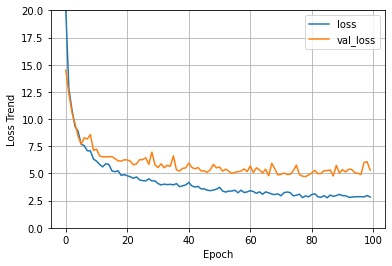

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 20])
plt.xlabel('Epoch')
plt.ylabel('Loss Trend')
plt.legend()
plt.grid(True)

In [23]:
#Yield prediction using Tensorflow Keras for 30% of data
predicted_yield4 = model.predict(X_valid)

In [24]:
# R^2 (coefficient of determination) regression score function: 
R_4 = r2_score(y_valid, predicted_yield4)
print('R^2:', R_4)

R^2: 0.9275923046189349


In [25]:
# Model accuracy using root mean square error 
rmse4 = np.sqrt(mean_squared_error(y_valid, predicted_yield4))  
print('rmse:', rmse4)

rmse: 7.47824939721348


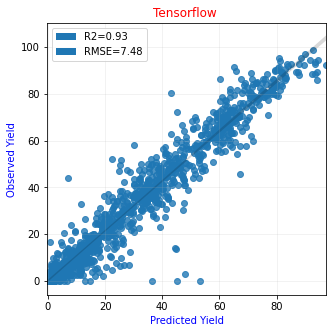

In [26]:
fig = plt.figure(figsize=(5,5))
sn.regplot(x=predicted_yield4, y=y_valid,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.2})
plt.xlabel('Predicted Yield', color='blue')
plt.ylabel('Observed Yield', color ='blue')
plt.title("Tensorflow ", color='red')
plt.grid(alpha=0.2)
R_4 = mpatches.Patch(label="R2={:04.2f}".format(R_4))
rmse4 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse4))
plt.legend(handles=[R_4,rmse4])